# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [2]:
from calcimetry.mongo_api import MongoInfo
from calcimetry.config import Config



### Retrieves all drill names

In [3]:
from calcimetry.calcimetry_api import CalcimetryAPI

with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

{'SDZ1256', 'OHZ2027', 'KEY1002', 'MAG3003', 'SUG2028', 'OHZ2006', 'REP2303', 'OHZ2024', 'SDZ1285', 'OHZ6560', 'SDZ1290', 'TPV1322', 'OHZ1845', 'OHZ1842', 'OHZ6561', 'OHZ2026', 'OHZ6563', 'NSC1412', 'DCN2002', 'SUG1118', 'OHZ2004', 'OHZ1304', 'SDZ1276', 'DCN2006', 'DIR1002', 'OHZ1525', 'SUG1201', 'OHZ6126', 'OHZ1844', 'KEY1001', 'OHZ1841', 'SDZ1291', 'OHZ1705', 'GGD4024', 'OHZ2029', 'TER1203', 'NIH2002', 'DIR2003', 'MCO3002', 'TER1201', 'OHZ2028', 'SDZ1257', 'SDZ1255', 'GIS1002', 'SUG1202', 'SDZ1277', 'SUG1105', 'GIS1004', 'OHZ2001', 'IBE2004', 'OHZ2030', 'SUG1203', 'OHZ7006', 'DPC3022', 'SUG1104', 'NSC1414', 'REP2302', 'OHZ2022', 'IBE2001', 'DPC3015', 'PAC1002', 'IBE2002', 'SDZ1286', 'BPE4023', 'SDZ1287', 'REP2206', 'DCN2003', 'KEY1205', 'DIR2002', 'GIS1001', 'OHZ6565', 'SUG1103', 'GGD4023', 'SUG1107', 'PAC2003', 'SUG1301', 'OHZ2023', 'MCO3001', 'SDZ1289', 'DPC3063', 'SUG1106', 'PAC1001', 'OHZ1302', 'SUG2101', 'SUG2020', 'OHZ6562', 'OHZ3004', 'PEP1002', 'REP2104', 'FOR1001', 'MAG3001'

### Retrieves image ids for one drillname
 

In [4]:
drillname="IBE2003"
with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.get_images_id(drillname))

[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669]


### Retrieve one image and its description from its id

{'ImageId': 2123, 'FileName': 'GTR2005-01_0004_REP2206_1100_1205.jpg', 'DrillName': 'REP2206', 'Cote0': 1100, 'Cote1': 1205, 'PxSize': 1600, 'PySize': 342, 'px0': 6, 'px1': 1587, 'k_Up': [[651, 63], [1144, 76], [1583, 79]], 'k_Down': [[645, 187], [896, 194], [1207, 200], [1591, 211]], 'k_Arrow': [[649, 112], [1055, 124], [1357, 131], [1574, 142]], 'criteria': {'n_measurements': 1, 'resolution': 0.06641366223908918, 'y_ratio': 0.3684210526315789, 'focus': 378.73707388568477, 'gradient': {'min': 0.0, 'max': 825.0006060603835, 'ave': 54.45850055493534, 'std': 88.21767529311215}, 'colours': [[49.35492326480626, 46.055010830472696, 34.13945409716469], [149.8866255478013, 116.12263972298986, 85.41627441432534], [225.19175079517322, 205.6489143963276, 194.94005670037245]], 'brisque': 28.17889404296875}}
0.06641366223908918
(1600, 342) (3036, 648) 0.035
# of measurements for this img: 1


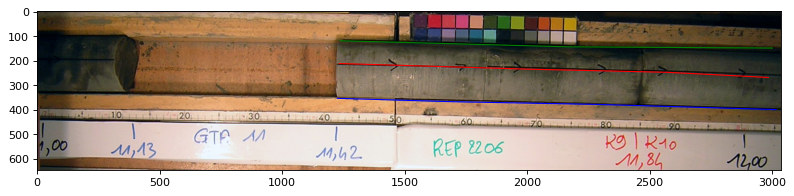

In [5]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches
from calcimetry.carrot_img import CarrotImage
from calcimetry.polyline import Polyline
IMG_ID = 2123


def draw_line(polyline: Polyline, color='red'):
    x = []
    y = []
    for t in iter(polyline):
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID)
    print(img.resolution)

    img = img.to_resolution(0.035)
    print(img.jpg.size, img.jpg.size, img.resolution)
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(img.jpg)
    if not img.k_arrow.empty:
        arrow_line = draw_line(img.k_arrow)
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(img.k_up, color='green')
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(img.k_down, color='blue')
        plt.gca().add_patch(arrow_line)


  
    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [8]:
from calcimetry.measurement import Measurement

idx_measure = 0
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



Measure: #3216 (image 2123): (1142->32) quality:5


Text(0.5, 0, 'val1m: 32')

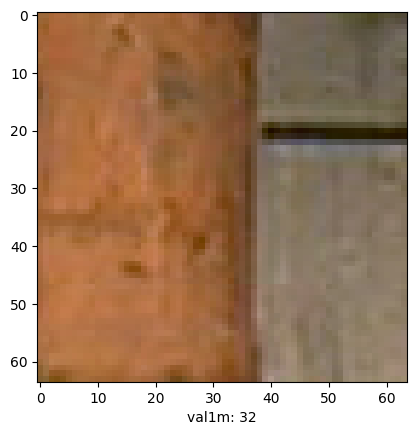

In [14]:
dim = 64
center = (
    img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote)# get on k_arrow line the position in pixel from this measure
    )
with CalcimetryAPI() as calcimetry_api:
    vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


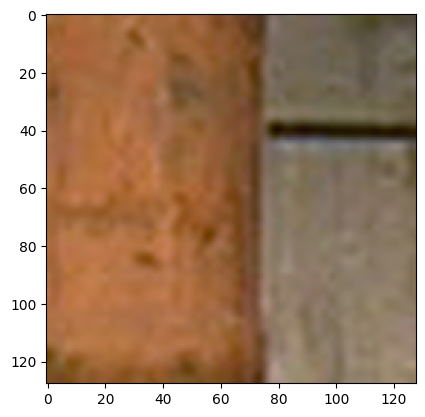

In [6]:
dim = 128
center = (
    img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote) # get on k_arrow line the position in pixel from this measure
    )
vignette = img.vignette(dim=dim, center=center)
plt.imshow(vignette)

### Retrieves images infos as a pandas dataframe

In [7]:
import pandas as pd
with CalcimetryAPI() as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

   ImageId                               FileName DrillName  Cote0  Cote1  \
0        0  GTR2012-07_0023_BPE4023_0000_0110.jpg   BPE4023      0    110   
1        1  GTR2012-07_0023_BPE4023_0090_0200.jpg   BPE4023     90    200   
2        2  GTR2012-07_0023_BPE4023_0180_0290.jpg   BPE4023    180    290   
3        3  GTR2012-07_0023_BPE4023_0270_0380.jpg   BPE4023    270    380   
4        4  GTR2012-07_0023_BPE4023_0350_0440.jpg   BPE4023    350    440   

   PxSize  PySize    px0     px1  \
0    3231     625   28.0  3137.0   
1    3456     630  172.0  3311.0   
2    3456     630  135.0  3273.0   
3    3456     636   97.0  3224.0   
4    2824     640    2.0  2574.0   

                                                k_Up  \
0  [[55, 173], [259, 179], [430, 177], [583, 171]...   
1  [[11, 187], [556, 189], [1081, 190], [1590, 18...   
2  [[8, 166], [388, 171], [1155, 177], [2061, 184...   
3  [[5, 181], [811, 182], [1253, 190], [2597, 199...   
4  [[6, 185], [186, 187], [524, 180], [1

## Measurements iteration and thumbnails generation

In [6]:
import numpy as np 
import tqdm


from calcimetry.calcimetry_api import CalcimetryAPI
from calcimetry.mongo_api import MongoAPI
from calcimetry.measurement import Measurement
from calcimetry.carrot_img import CarrotImage
from calcimetry.thumbnail import Thumbnail


def insert_thumbnails(calci_api, 
                      img: CarrotImage, 
                      measure: Measurement, 
                      version : str,
                      dim=48, 
                      n_images=4, 
                      above=True ):

    half_dim = dim // 2
    px = img.p_x(measure.cote)

    if above:
        top_line = img.k_up
        bottom_line = img.k_arrow
    else:
        top_line = img.k_arrow
        bottom_line = img.k_down

    n_inserted = 0
    try:
        remaining_h = max(0.5*(bottom_line.p_y(px) - top_line.p_y(px) - dim), 0)
        for _ in range(n_images):
        
            x_offset = np.random.uniform(low=-dim//2, high=0) 
            y_offset = np.random.uniform(low=0, high=2*remaining_h)

            cx = px + x_offset + half_dim
            cy = top_line.p_y(px) + y_offset + half_dim
        
            jpg = img.vignette(dim=dim, center=(cx, cy))

            thumbnail = Thumbnail(
                version,
                jpg, 
                bbox=(cx, cy, dim), 
                measurement=measure
                )

            calci_api.db['datasets'].insert_one(thumbnail.to_dict())
            n_inserted += 1
    except Exception as er:
        print(f"unable to extract thumbnail {img.image_id} at {measure.measure_id}->skip")

    return n_inserted


def update_dataset(version):

    with CalcimetryAPI() as calci_api:
        measurements = calci_api.get_all_measurements()
        
        n_samples = 0
       
        for m in tqdm.tqdm(measurements):

            if int(m.quality) < 9 or float(m.val_1m) >= 85:
                continue
                 
            IMG_ID = m.image_id

            img = calci_api.read_image(IMG_ID)
            try:
                img = img.to_resolution(0.035) 
                
                n_samples += insert_thumbnails(calci_api, img, m, version, above=True)
                n_samples += insert_thumbnails(calci_api, img, m, version, above=False)
            except Exception as er:
                print(f"error with image {IMG_ID} : {str(er)}")

  
update_dataset("1.1")


    

  0%|          | 0/4108 [00:00<?, ?it/s]

 66%|██████▌   | 2693/4108 [07:46<00:22, 63.90it/s]  

unable to extract thumbnail 2076 at 3186->skip
unable to extract thumbnail 2076 at 3186->skip
unable to extract thumbnail 2076 at 3187->skip
unable to extract thumbnail 2076 at 3187->skip


 66%|██████▌   | 2702/4108 [07:47<00:34, 40.44it/s]

unable to extract thumbnail 2076 at 3188->skip
unable to extract thumbnail 2076 at 3188->skip
unable to extract thumbnail 2076 at 3189->skip
unable to extract thumbnail 2076 at 3189->skip
unable to extract thumbnail 2076 at 3190->skip
unable to extract thumbnail 2076 at 3190->skip
unable to extract thumbnail 2076 at 3191->skip
unable to extract thumbnail 2076 at 3191->skip


 67%|██████▋   | 2765/4108 [07:48<00:21, 62.25it/s]

unable to extract thumbnail 2076 at 3192->skip
unable to extract thumbnail 2076 at 3192->skip
unable to extract thumbnail 2076 at 3193->skip
unable to extract thumbnail 2076 at 3193->skip


 68%|██████▊   | 2774/4108 [07:49<00:38, 34.73it/s]

unable to extract thumbnail 2076 at 3194->skip
unable to extract thumbnail 2076 at 3194->skip
unable to extract thumbnail 2076 at 3195->skip
unable to extract thumbnail 2076 at 3195->skip


 68%|██████▊   | 2813/4108 [07:49<00:18, 70.82it/s]

unable to extract thumbnail 2541 at 3774->skip
unable to extract thumbnail 2541 at 3774->skip
error with image 2549 : cannot convert float NaN to integer


100%|██████████| 4108/4108 [08:18<00:00,  8.24it/s] 



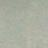
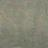
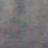
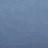
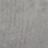
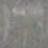
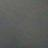
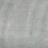
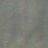
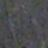

In [14]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches
from calcimetry.polyline import Polyline
from calcimetry.dataset_api import DatasetsAPI


def draw_line(polyline: Polyline, color='red'):
    x = []
    y = []
    for t in iter(polyline):
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


def draw_image(img: CarrotImage, m: Measurement):
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(img.jpg)
    if not img.k_arrow.empty:
        arrow_line = draw_line(img.k_arrow)
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(img.k_up, color='green')
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(img.k_down, color='blue')
        plt.gca().add_patch(arrow_line)
       

import base64
import io
from IPython.display import Image, HTML, display

def to_base64(img):
    byte_array = io.BytesIO()
    img.save(byte_array, format='jpeg')
    return base64.b64encode(byte_array.getvalue())



html_str='<div style="display: inline-block"><img src="data:image/jpeg;base64,%s"/></div>'
th_str = ""
with DatasetsAPI() as dataset_api:
    thumbnails = dataset_api.read_random(version="1.0")
    for th in thumbnails:
        encoded = Thumbnail.to_base64(th.jpg)
        th_str += html_str % (encoded)
   

HTML(th_str) 

